# Function

In [ ]:
# Grup Sutununa(group_col) gore gruplayip, uzerinde calisilan sutunun(col_name) null degerlerini ffill & bfill ile doldurur.
# Hala null deger kalma ihtimaline binaen, gruplama yapmaksizin, uzerinde calisilan sutunda da(col_name) ekstradan ffill & bfill yapar
def fill_prop(df, group_col, col_name):
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        grp_inx = list(df[cond][col_name].index)
        df.loc[cond, col_name] = df.loc[cond, col_name].fillna(method="ffill").fillna(method="bfill")
    df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))
# Grup Sutununa(group_col) gore gruplayip, uzerinde calisilan sutunun(col_name) null degerlerini mode ile doldurur.
def fill_most(df, group_col, col_name):
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        grp_inx = list(df[cond][col_name].index)
        mode = list(df[cond][col_name].mode())
        if mode != []:
            df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[cond][col_name].mode()[0])
        else:
            df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[col_name].mode()[0])
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))
# Grup Sutunlarina(group_col1 ve group_col2) gore gruplayip, uzerinde calisilan sutunun(col_name) null degerlerini "mode" or "median" or "ffill & bfill ile doldurur.
def fill(df, group_col1, group_col2, col_name, method): # method can be "mode" or "median" or "ffill/bfill"
    if method == "mode":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                grp_inx = list(df[cond2][col_name].index)
                mode1 = list(df[cond1][col_name].mode())
                mode2 = list(df[cond2][col_name].mode())
                if (mode1 != []) and (mode2 != []):
                    df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[cond2][col_name].mode()[0]).fillna(df[cond1][col_name].mode()[0])
                elif mode1 != []:
                    df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[cond1][col_name].mode()[0])
                else:
                    df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[col_name].mode()[0])
                
    elif method == "median":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                grp_inx = list(df[cond2][col_name].index)
                df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[cond2][col_name].median()).fillna(df[cond1][col_name].median()).fillna(df[col_name].median())
                
    elif method == "ffill":           
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                grp_inx = list(df[cond2][col_name].index)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(method="ffill").fillna(method="bfill")
                
        for group1 in list(df[group_col1].unique()):
            cond1 = df[group_col1]==group1
            df.loc[cond1, col_name] = df.loc[cond1, col_name].fillna(method="ffill").fillna(method="bfill")            
           
        df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))
def null_values(df, rate=0):
    """a function to show null values with percentage"""
    nv=pd.concat([df.isnull().sum(), 100 * df.isnull().sum()/df.shape[0]],axis=1).rename(columns={0:'Missing_Records', 1:'Percentage (%)'})
    return nv[nv['Percentage (%)']>rate].sort_values('Percentage (%)', ascending=False)

def replace_outliers(s, replaced_value='median',whisker=1.5):
  # replace outliers with 'median','mean','mode' or an assigned value.
  indexes = s.dropna().index
  col = s.dropna()
  iqr = (np.quantile(col, 0.75))-(np.quantile(col, 0.25))
  upper_bound = np.quantile(col, 0.75)+(whisker*iqr)
  lower_bound = np.quantile(col, 0.25)-(whisker*iqr)
  upper_bound = upper_bound if upper_bound < col.max() else col.max(),
  lower_bound = lower_bound if lower_bound > col.min() else col.min(),
  if replaced_value=='median':
    col = col.mask(col > upper_bound, col.median())
    col = col.mask(col < lower_bound, col.median())
  elif replaced_value=='mean':
    col = col.mask(col > upper_bound, col.mean())
    col = col.mask(col < lower_bound, col.mean())
  elif replaced_value=='mode':
    col = col.mask(df[col] > upper_bound, col.mode()[0])
    col = col.mask(df[col] < lower_bound, col.mode()[0])
  else:
    col = col.mask(col > upper_bound, replaced_value)
    col= col.mask(col < lower_bound, replaced_value)   
  plt.figure(figsize=(8,3))
  sns.boxplot(x= col)
  plt.show()
  s[indexes]=col
  return s

def outliers(s):
  # summary of the outliers
  s=s.dropna()
  iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
  upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
  lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
  f = []
  for i in s:
      if i > upper_bound:
          f.append(i)
      elif i < lower_bound:
          f.append(i)
  count = int(len(f))
  pros = len(f)/len(s)
  d = {'IQR':iqr,
      'Lower Bound':lower_bound if lower_bound > s.min() else s.min(),
       'Q1':np.quantile(s, 0.25),
       'Q2':np.quantile(s, 0.50),
       'Q3':np.quantile(s, 0.75),
      'Upper Bound':upper_bound if upper_bound < s.max() else s.max(),
      'Count of Outliers': count,'Percentage of Outliers':pros}
  d = pd.DataFrame(d.items(),columns = ['count','values'])
  return(d)

def capping_outliers(s, whisker=1.5):
  # replace outliers with upper_bound and lower_bound values
  indexes = s.dropna().index
  col = s.dropna()
  iqr = (np.quantile(col, 0.75))-(np.quantile(col, 0.25))
  upper_bound = np.quantile(col, 0.75)+(whisker*iqr)
  lower_bound = np.quantile(col, 0.25)-(whisker*iqr)
  upper_bound = upper_bound if upper_bound < col.max() else col.max(),
  lower_bound = lower_bound if lower_bound > col.min() else col.min(),
  col = np.where(col > upper_bound, upper_bound,col)
  col = np.where(col < lower_bound, lower_bound,col)
  plt.figure(figsize=(8,3))
  sns.boxplot(x= col)
  plt.show()
  s[indexes]=col
  return s

def show_nans(df, limit=0):
  """
  Display the missing value ratio of the features that contain the missing value at the rate above the given limit.
  """
  missing = df.isnull().sum()*100/df.shape[0]
  return missing.loc[lambda x : x >= limit]

def perc_nans(serial):
  """
  display percentage of nans in a Series
  """
  return serial.isnull().sum()/serial.shape[0]*100

def null_values(df, rate=0):
  """
  a function to show null values with percentage
  """
  nv=pd.concat([df.isnull().sum(), 100 * df.isnull().sum()/df.shape[0]],axis=1).rename(columns={0:'Missing_Records', 1:'Percentage (%)'})
  return nv[nv['Percentage (%)']>rate].sort_values('Percentage (%)', ascending=False)

def v_counts(df, s):
  """
  a function to show the count and the percentage of null values
  """
  s1 = df[s].value_counts(dropna=False)
  s2 = df[s].value_counts(dropna=False, normalize=True)*100
  multicol1 = pd.MultiIndex.from_tuples([(s, 'COUNT'),
                                       (s, 'RATE')])
  s3 = pd.concat([s1, s2], axis=1, keys=multicol1)
  return s3

# Import Data

In [ ]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
data=pd.read_csv('/content/drive/MyDrive/demo/autoscout_data_2000.csv')

In [ ]:
df=data.copy()
df.head()

location                                                url  \
0   LOON OP ZAND, NL  https://www.autoscout24.com/offers/audi-a3-2-0...   
1        HEERLEN, NL  https://www.autoscout24.com/offers/audi-a3-spo...   
2          BREDA, NL  https://www.autoscout24.com/offers/audi-a3-1-4...   
3  BAARLE-NASSAU, NL  https://www.autoscout24.com/offers/audi-a1-1-4...   
4        ZUTPHEN, NL  https://www.autoscout24.com/offers/audi-a1-s-l...   

          make     model                                  short_description  \
0  \n,Audi ,\n  \n,A3,\n                          2.0 FSI Ambition Pro Line   
1  \n,Audi ,\n  \n,A3,\n  Sportback 1.4 TFSI Ambiente/ECC/PDC//Lichtmeta...   
2  \n,Audi ,\n  \n,A3,\n  1.4 TFSI Attraction Pro Line [ Navi Airco Crui...   
3  \n,Audi ,\n  \n,A1,\n    1.4 TFSI Sportback Pro-Line Aut. S-Tronic Navi.   
4  \n,Audi ,\n  \n,A1,\n  S-Line | Automaat | Navigatie | Cruise-/Climat...   

                          price               mileage          gearbox  \
0   [['\n', '€ 4,450.-', '\n']]  ['', ['191,066 km']]  \n,Automatic,\n   
1  [['\n', '€ 12,950.-', '\n']]   ['', ['94,758 km']]  \n,Automatic,\n   
2  [['\n', '€ 12,445.-', '\n']]  ['', ['160,883 km']]  \n,Automatic,\n   
3  [['\n', '€ 12,450.-', '\n']]  ['', ['145,102 km']]  \n,Automatic,\n   
4  [['\n', '€ 14,945.-', '\n']]  ['', ['119,666 km']]  \n,Automatic,\n   

  registration       fuel_type             power                seller  \
0      08/2003  \n,Gasoline,\n  110 kW (150 hp),  ['\n', ['Dealer\n']]   
1      10/2013  \n,Gasoline,\n   92 kW (125 hp),  ['\n', ['Dealer\n']]   
2      05/2013  \n,Gasoline,\n   90 kW (122 hp),  ['\n', ['Dealer\n']]   
3      06/2015  \n,Gasoline,\n   92 kW (125 hp),  ['\n', ['Dealer\n']]   
4      10/2015  \n,Gasoline,\n   92 kW (125 hp),  ['\n', ['Dealer\n']]   

       body_type        type   drivetrain seats doors  \
0  \n,Compact,\n  \n,Used,\n  \n,Front,\n   \n5   \n3   
1  \n,Compact,\n  \n,Used,\n  \n,Front,\n   \n5   \n5   
2  \n,Compact,\n  \n,Used,\n   \n,None,\n   \n5   \n5   
3  \n,Compact,\n  \n,Used,\n   \n,None,\n   \n5   \n5   
4  \n,Compact,\n  \n,Used,\n  \n,Front,\n   \n4   \n3   

               country_version offer_number        warranty         Mileage  \
0         Country version,None   \nSJ-112-R  \n,6 months,\n  [['\n'], ['']]   
1         Country version,None     \n809725      \n,None,\n  [['\n'], ['']]   
2         Country version,None   \n1-KJK-58      \n,None,\n  [['\n'], ['']]   
3  Country version,Netherlands    \n2601307  \n,6 months,\n  [['\n'], ['']]   
4         Country version,None   \nL-847-SK  \n,6 months,\n  [['\n'], ['']]   

  first_registration production_date general_inspection last_service  \
0            08/2003            None            05/2022         None   
1            10/2013            None               None         None   
2            05/2013            None            03/2022         None   
3            06/2015            2015                New         None   
4            10/2015            None               None         None   

  full_service_history non_smoker_vehicle      previous_owner  \
0            \n,Yes,\n         \n,None,\n  [['\n'], ['None']]   
1            \n,Yes,\n         \n,None,\n  [['\n'], ['None']]   
2           \n,None,\n         \n,None,\n  [['\n'], ['None']]   
3            \n,Yes,\n          \n,Yes,\n  [['\n'], ['None']]   
4            \n,Yes,\n         \n,None,\n  [['\n'], ['None']]   

  last_timing_belt_change                  Power          Gearbox  \
0      [['\n'], ['None']]  \n,110 kW (150 hp),\n  \n,Automatic,\n   
1      [['\n'], ['None']]   \n,92 kW (125 hp),\n  \n,Automatic,\n   
2      [['\n'], ['None']]   \n,90 kW (122 hp),\n  \n,Automatic,\n   
3      [['\n'], ['None']]   \n,92 kW (125 hp),\n  \n,Automatic,\n   
4      [['\n'], ['None']]   \n,92 kW (125 hp),\n  \n,Automatic,\n   

      engine_size       gears cylinders    empty_weight       Fuel_type  \
0  \n,1,984 cc,\n  \n,None,\n   \n,4,\n  \n,1,280 kg,\n  \n,Supe

# Rename columns

In [ ]:
df.rename(columns={"\nComfort & Convenience\n":"comfort_convenience",
                   "\nmanufacturer_color":"manufacturer_color",
                   "\ncolour":"colour",
                   '\npaint':'paint',
                   '\nEntertainment & Media\n':'entertainment_media',
                   "\nSafety & Security\n":"Safety_Security",
                   " upholstery_colour ":"upholstery_colour",
                   " upholstery ":"upholstery"},inplace=True)

In [ ]:
df.head()

location                                                url  \
0   LOON OP ZAND, NL  https://www.autoscout24.com/offers/audi-a3-2-0...   
1        HEERLEN, NL  https://www.autoscout24.com/offers/audi-a3-spo...   
2          BREDA, NL  https://www.autoscout24.com/offers/audi-a3-1-4...   
3  BAARLE-NASSAU, NL  https://www.autoscout24.com/offers/audi-a1-1-4...   
4        ZUTPHEN, NL  https://www.autoscout24.com/offers/audi-a1-s-l...   

          make     model                                  short_description  \
0  \n,Audi ,\n  \n,A3,\n                          2.0 FSI Ambition Pro Line   
1  \n,Audi ,\n  \n,A3,\n  Sportback 1.4 TFSI Ambiente/ECC/PDC//Lichtmeta...   
2  \n,Audi ,\n  \n,A3,\n  1.4 TFSI Attraction Pro Line [ Navi Airco Crui...   
3  \n,Audi ,\n  \n,A1,\n    1.4 TFSI Sportback Pro-Line Aut. S-Tronic Navi.   
4  \n,Audi ,\n  \n,A1,\n  S-Line | Automaat | Navigatie | Cruise-/Climat...   

                          price               mileage          gearbox  \
0   [['\n', '€ 4,450.-', '\n']]  ['', ['191,066 km']]  \n,Automatic,\n   
1  [['\n', '€ 12,950.-', '\n']]   ['', ['94,758 km']]  \n,Automatic,\n   
2  [['\n', '€ 12,445.-', '\n']]  ['', ['160,883 km']]  \n,Automatic,\n   
3  [['\n', '€ 12,450.-', '\n']]  ['', ['145,102 km']]  \n,Automatic,\n   
4  [['\n', '€ 14,945.-', '\n']]  ['', ['119,666 km']]  \n,Automatic,\n   

  registration       fuel_type             power                seller  \
0      08/2003  \n,Gasoline,\n  110 kW (150 hp),  ['\n', ['Dealer\n']]   
1      10/2013  \n,Gasoline,\n   92 kW (125 hp),  ['\n', ['Dealer\n']]   
2      05/2013  \n,Gasoline,\n   90 kW (122 hp),  ['\n', ['Dealer\n']]   
3      06/2015  \n,Gasoline,\n   92 kW (125 hp),  ['\n', ['Dealer\n']]   
4      10/2015  \n,Gasoline,\n   92 kW (125 hp),  ['\n', ['Dealer\n']]   

       body_type        type   drivetrain seats doors  \
0  \n,Compact,\n  \n,Used,\n  \n,Front,\n   \n5   \n3   
1  \n,Compact,\n  \n,Used,\n  \n,Front,\n   \n5   \n5   
2  \n,Compact,\n  \n,Used,\n   \n,None,\n   \n5   \n5   
3  \n,Compact,\n  \n,Used,\n   \n,None,\n   \n5   \n5   
4  \n,Compact,\n  \n,Used,\n  \n,Front,\n   \n4   \n3   

               country_version offer_number        warranty         Mileage  \
0         Country version,None   \nSJ-112-R  \n,6 months,\n  [['\n'], ['']]   
1         Country version,None     \n809725      \n,None,\n  [['\n'], ['']]   
2         Country version,None   \n1-KJK-58      \n,None,\n  [['\n'], ['']]   
3  Country version,Netherlands    \n2601307  \n,6 months,\n  [['\n'], ['']]   
4         Country version,None   \nL-847-SK  \n,6 months,\n  [['\n'], ['']]   

  first_registration production_date general_inspection last_service  \
0            08/2003            None            05/2022         None   
1            10/2013            None               None         None   
2            05/2013            None            03/2022         None   
3            06/2015            2015                New         None   
4            10/2015            None               None         None   

  full_service_history non_smoker_vehicle      previous_owner  \
0            \n,Yes,\n         \n,None,\n  [['\n'], ['None']]   
1            \n,Yes,\n         \n,None,\n  [['\n'], ['None']]   
2           \n,None,\n         \n,None,\n  [['\n'], ['None']]   
3            \n,Yes,\n          \n,Yes,\n  [['\n'], ['None']]   
4            \n,Yes,\n         \n,None,\n  [['\n'], ['None']]   

  last_timing_belt_change                  Power          Gearbox  \
0      [['\n'], ['None']]  \n,110 kW (150 hp),\n  \n,Automatic,\n   
1      [['\n'], ['None']]   \n,92 kW (125 hp),\n  \n,Automatic,\n   
2      [['\n'], ['None']]   \n,90 kW (122 hp),\n  \n,Automatic,\n   
3      [['\n'], ['None']]   \n,92 kW (125 hp),\n  \n,Automatic,\n   
4      [['\n'], ['None']]   \n,92 kW (125 hp),\n  \n,Automatic,\n   

      engine_size       gears cylinders    empty_weight       Fuel_type  \
0  \n,1,984 cc,\n  \n,None,\n   \n,4,\n  \n,1,280 kg,\n  \n,Supe

# Drop List

In [ ]:
drop_list={"gearbox","manufacturer_color","previous_owner",'country_version','location',"offer_number","Mileage","url","short_description","production_date","last_timing_belt_change","power","registration","Fuel_type","last_service","emissions_sticker","fuel_consumption"}
#it has two gearbox,registration and power columns so we deleted the columns with more blanks
#We deleted manufacturer_color column because there is no value in the column.
#The previous owner number will give us information about the mileage of the vehicle. We deleted this column because the data frame has the mileage information and column has many blank value.
#we deleted offer number,production date and last timing belt change because  these columns have many blank values.

# Cleansing


In [ ]:
df['price']=df['price'].str.extract('€.(\d*,*\d*)')[0].str.replace(",","")
df=df.dropna(subset=['price']).reset_index(drop=True)

df['colour'] = df['colour'].replace('\n4, ','', regex=True)

df['doors']=df['doors'].str.replace("\n","",regex=True)

df['first_registration'] = df['first_registration'].str.extract('\/(.*)')
df=df.dropna(subset=['first_registration']).reset_index(drop=True)

df['extras']=df['extras'].str.replace('\[','',regex=True).replace('\]','',regex=True)

df.fuel_consumption=df.fuel_consumption.str.strip()
df["_fuel_con_comb"] =df.fuel_consumption.str.extract("([0-9]+\.?[0-9]*)")    #I created new feature from "fuel_consumption"

df['mileage']=df['mileage'].str.extract('(\d+\W?\d*)')[0].str.replace(",","").astype('float')

df['gears'] = df['gears'].replace('\n','', regex=True)
df['gears']=df['gears'].replace(',','',regex=True)



df['co2_emissions'] = df['co2_emissions'].str.extract('(\d\d\d)')


df['cylinders'] = df['cylinders'].str.extract('(\d)')

df['Gearbox'] = df['Gearbox'].str.extract('\,(.*)\,')

df['body_type'] = df['body_type'].str.extract('\,(.*)\,')

df['type'] = df['type'].str.extract('\,(.*)\,')

df['comfort_convenience'] = df['comfort_convenience'].str.replace('\[','', regex=True).replace('\]','', regex=True)
df['comfort_convenience'] = df['comfort_convenience'].str.replace(', ',',', regex=True)
df['comfort_convenience'] = df['comfort_convenience'].str.replace(' ','_', regex=True)
df['comfort_convenience'] = df['comfort_convenience'].str.replace('-','_', regex=True)
df['comfort_convenience'] = df['comfort_convenience'].str.replace('\'','', regex=True)

df['comfort_convenience'] = df['comfort_convenience'].str.replace('contro','control', regex=True)
df['comfort_convenience'] = df['comfort_convenience'].str.replace('whee','wheel', regex=True)
df['comfort_convenience'] = df['comfort_convenience'].str.replace('controll','control', regex=True)
df['comfort_convenience'] = df['comfort_convenience'].str.replace('wheell','wheel', regex=True)

df['drivetrain'] = df['drivetrain'].replace('\n','', regex=True)
df['drivetrain'] = df['drivetrain'].replace(',','', regex=True)

df['Safety_Security'] = df['Safety_Security'].str.replace('\[','', regex=True).replace('\]','', regex=True)
df['Safety_Security'] = df['Safety_Security'].str.replace(', ',',', regex=True)
df['Safety_Security'] = df['Safety_Security'].str.replace(' ','_', regex=True)
df['Safety_Security'] = df['Safety_Security'].str.replace('-','_', regex=True)
df['Safety_Security'] = df['Safety_Security'].str.replace('\'','', regex=True)

df['Safety_Security'] = df['Safety_Security'].str.replace('Contro','Control', regex=True)
df['Safety_Security'] = df['Safety_Security'].str.replace('contro','control', regex=True)
df['Safety_Security'] = df['Safety_Security'].str.replace('controll','control', regex=True)
df['Safety_Security'] = df['Safety_Security'].str.replace('Controll','Control', regex=True)

df['emission_class']=df['emission_class'].str.extract('(\d(.*))').replace(',','', regex=True)[0]

df['emission_class'] = df['emission_class'].str.replace("6d", '6', regex = True)
df['emission_class'] = df['emission_class'].str.replace("6c", '6', regex = True)
df['emission_class'] = df['emission_class'].str.replace("-TEMP", '', regex = True)

df['make'] = df['make'].replace(',', "", regex = True)
df['make'] = df['make'].replace('\n', "", regex = True)
df['make'] = df['make'].replace(' ','', regex=True)
df=df.dropna(subset=['make']).reset_index(drop=True)


df['model'] = df['model'].replace(',', "", regex = True)
df['model'] = df['model'].replace('\n', "", regex = True)
df=df.dropna(subset=['model']).reset_index(drop=True)

df['seller'] = df['seller'].str.replace('[', '').str.replace(']', '').astype(str)
df['seller'] = df['seller'].str.replace("'", '', regex = True)
df['seller'] = df['seller'].replace('\n', "", regex = True)
df['seller'] = df['seller'].replace(',', "", regex = True)

spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    df['seller'] = df['seller'].str.replace(char, ' ')

    df['seller'] = df['seller'].replace("n", "", regex = True)
df['seller'] = df['seller'].replace(" ", "", regex = True)

df['seller']=df['seller'].replace('Diesel',np.nan)
df['seller']=df['seller'].replace('Gasolie',np.nan)
df['seller']=df['seller'].replace('Electric',np.nan)
df=df.dropna(subset=['seller']).reset_index(drop=True)

df['seats'] = df['seats'].replace(',', "", regex = True)
df['seats'] = df['seats'].replace('\n', "", regex = True)

df['seats'] = df['seats'].str.replace('1', '2', regex = True)
df['seats'] = df['seats'].str.replace('24', '14', regex = True)

df['engine_size'] = df['engine_size'].replace(',', "", regex = True)
df['engine_size'] = df['engine_size'].replace('\n', "", regex = True)
df['engine_size'] = df['engine_size'].replace(' ', "", regex = True)
df['engine_size'] = df['engine_size'].replace('cc', "", regex = True)

df['upholstery_colour'] = df['upholstery_colour'].replace('\nupholstery', "", regex = True)
df['upholstery_colour'] = df['upholstery_colour'].replace(", ", "", regex = True)

df['upholstery'] = df['upholstery'].replace('\n8', "", regex = True)
df['upholstery'] = df['upholstery'].replace(", ", "", regex = True)

df['fuel_type'] = df['fuel_type'].replace(',', "", regex = True)
df['fuel_type'] = df['fuel_type'].replace('\n', "", regex = True)


df['fuel_type']=df['fuel_type'].replace('Automatic',np.nan)
df['fuel_type']=df['fuel_type'].replace('Manual',np.nan)
df=df.dropna(subset=['fuel_type']).reset_index(drop=True)

df['fuel_type'] = df['fuel_type'].str.replace("Hydrogen", 'Others', regex = True)
df['fuel_type'] = df['fuel_type'].str.replace("Ethanol", 'Others', regex = True)
df['fuel_type'] = df['fuel_type'].str.replace("CNG", 'Others', regex = True)

df['general_inspection']=df['general_inspection'].replace("New",'01/2222')
df['general_inspection'] = df['general_inspection'].str.extract('\/(.*)')

df['paint'] = df['paint'].replace('\npaint, Metallic','1', regex=True)
df['paint']=df['paint'].replace('None',0,regex=True)

df['warranty'] = df['warranty'].replace('\n','', regex=True)
df['warranty'] = df['warranty'].replace(',','', regex=True)
df['warranty']=df['warranty'].replace('None',0,regex=True)
df['warranty']=df['warranty'].replace('months','', regex=True)
df['warranty']=df['warranty'].replace(' ','', regex=True)
df['warranty']=df['warranty'].replace('Yes','6', regex=True)

df['Power']=df['Power'].str.extract('(\d\d\d|\d\d)')

df['empty_weight']=df['empty_weight'].str.extract('(\d\,\d+)')
df['empty_weight'] = df['empty_weight'].replace(',','.', regex=True)

df['entertainment_media'] = df['entertainment_media'].str.replace('\[','', regex=True).replace('\]','', regex=True)
df['entertainment_media'] = df['entertainment_media'].str.replace("'",'', regex=True)
df['entertainment_media']=df['entertainment_media'].str.strip()
df['entertainment_media'] = df['entertainment_media'].str.replace(", ",',', regex=True)
df['entertainment_media'] = df['entertainment_media'].str.replace(" ",'_', regex=True)

df['full_service_history'] = df['full_service_history'].replace(',', "", regex = True)
df['full_service_history'] = df['full_service_history'].replace('\n', "", regex = True)

df['full_service_history'] = df['full_service_history'].replace('Yes','1',regex=True)
df['full_service_history'] = df['full_service_history'].replace('None','0',regex=True)

df['non_smoker_vehicle'] = df['non_smoker_vehicle'].replace(',', "", regex = True)
df['non_smoker_vehicle'] = df['non_smoker_vehicle'].replace('\n', "", regex = True)

df['non_smoker_vehicle'] = df['non_smoker_vehicle'].replace('Yes','1',regex=True)
df['non_smoker_vehicle'] = df['non_smoker_vehicle'].replace('None','0',regex=True)

df['location'] = df['location'].str.replace('\\','',regex=True)
df.location = df.location.str.strip(", NL")
df.location = df.location.str.title()




df=df.replace("None",np.nan)



In [ ]:
df.head()

location                                                url  make  \
0    Oon Op Zand  https://www.autoscout24.com/offers/audi-a3-2-0...  Audi   
1         Heerle  https://www.autoscout24.com/offers/audi-a3-spo...  Audi   
2          Breda  https://www.autoscout24.com/offers/audi-a3-1-4...  Audi   
3  Baarle-Nassau  https://www.autoscout24.com/offers/audi-a1-1-4...  Audi   
4         Zutphe  https://www.autoscout24.com/offers/audi-a1-s-l...  Audi   

  model                                  short_description  price   mileage  \
0    A3                          2.0 FSI Ambition Pro Line   4450  191066.0   
1    A3  Sportback 1.4 TFSI Ambiente/ECC/PDC//Lichtmeta...  12950   94758.0   
2    A3  1.4 TFSI Attraction Pro Line [ Navi Airco Crui...  12445  160883.0   
3    A1    1.4 TFSI Sportback Pro-Line Aut. S-Tronic Navi.  12450  145102.0   
4    A1  S-Line | Automaat | Navigatie | Cruise-/Climat...  14945  119666.0   

           gearbox registration fuel_type             power  seller body_type  \
0  \n,Automatic,\n      08/2003  Gasoline  110 kW (150 hp),  Dealer   Compact   
1  \n,Automatic,\n      10/2013  Gasoline   92 kW (125 hp),  Dealer   Compact   
2  \n,Automatic,\n      05/2013  Gasoline   90 kW (122 hp),  Dealer   Compact   
3  \n,Automatic,\n      06/2015  Gasoline   92 kW (125 hp),  Dealer   Compact   
4  \n,Automatic,\n      10/2015  Gasoline   92 kW (125 hp),  Dealer   Compact   

   type drivetrain seats doors              country_version offer_number  \
0  Used      Front     5     3         Country version,None   \nSJ-112-R   
1  Used      Front     5     5         Country version,None     \n809725   
2  Used        NaN     5     5         Country version,None   \n1-KJK-58   
3  Used        NaN     5     5  Country version,Netherlands    \n2601307   
4  Used      Front     4     3         Country version,None   \nL-847-SK   

  warranty         Mileage first_registration production_date  \
0        6  [['\n'], ['']]               2003             NaN   
1        0  [['\n'], ['']]               2013             NaN   
2        0  [['\n'], ['']]               2013             NaN   
3        6  [['\n'], ['']]               2015            2015   
4        6  [['\n'], ['']]               2015             NaN   

  general_inspection  last_service full_service_history non_smoker_vehicle  \
0               2022           NaN                    1                  0   
1                NaN           NaN                    1                  0   
2               2022           NaN                    0                  0   
3               2222           NaN                    1                  1   
4                NaN           NaN                    1                  0   

       previous_owner last_timing_belt_change Power    Gearbox engine_size  \
0  [['\n'], ['None']]      [['\n'], ['None']]   110  Automatic        1984   
1  [['\n'], ['None']]      [['\n'], ['None']]    92  Automatic        1395   
2  [['\n'], ['None']]      [['\n'], ['None']]    90  Automatic        1395   
3  [['\n'], ['None']]      [['\n'], ['None']]    92  Automatic        1395   
4  [['\n'], ['None']]      [['\n'], ['None']]    92  Automatic        1395   

  gears cylinders empty_weight       Fuel_type  \
0   NaN         4        1.280  \n,Super 95,\n   
1   NaN         4        1.200  \n,Gasoline,\n   
2   NaN         4        1.200  \n,Gasoline,\n   
3   NaN         4          NaN  \n,Gasoline,\n   
4     7         4        1.105  \n,Gasoline,\n   

                                    fuel_consumption co2_emissions  \
0                                             ,None,           NaN   
1   ['\n', ['4.9 l/100 km (comb.)', ' ', ' '], '\n']           NaN   
2     ['\n', ['5 l/100 km (comb.)', ' ', ' '], '\n']           116   
3  ['\n', ['0 l/100 km (comb.)', '0 l/100 km (cit...           NaN   
4  ['\n', ['4.8 l/100 km (comb.)', '5.9 l/100 km ...           111   

  emission_class emissions_sticker  \
0              4        \n,None,\n   

# Change Type

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69486 entries, 0 to 69485
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   location                 69486 non-null  object 
 1   url                      69486 non-null  object 
 2   make                     69486 non-null  object 
 3   model                    69486 non-null  object 
 4   short_description        69320 non-null  object 
 5   price                    69486 non-null  object 
 6   mileage                  69338 non-null  float64
 7   gearbox                  69486 non-null  object 
 8   registration             69486 non-null  object 
 9   fuel_type                69486 non-null  object 
 10  power                    69486 non-null  object 
 11  seller                   69486 non-null  object 
 12  body_type                68414 non-null  object 
 13  type                     68414 non-null  object 
 14  drivetrain            

In [ ]:
df.price=df.price.astype('float') 
df.cylinders=df.cylinders.astype('float') 
df.cylinders=df.cylinders.astype('float') 
df.co2_emissions=df.co2_emissions.astype('float') 

df.doors=df.doors.astype("float")

df = df.astype({'warranty':'int'})

df.Power=df.Power.astype("float")
df.drop(df[df.Power < 30].index, inplace=True)

df['paint'] = df['paint'].astype(int)

df['empty_weight']=df['empty_weight'].astype('float')
df['empty_weight']=np.where(df['empty_weight'].notna(),df['empty_weight']*1000,df['empty_weight'])


df['_fuel_con_comb']=df['_fuel_con_comb'].astype(float)

df.first_registration=df.first_registration.astype('int')

df['engine_size']=df.engine_size.astype('float')
df['seats']=df.seats.astype('float')
df['emission_class']=df.emission_class.astype('float')
df['full_service_history']=df.full_service_history.astype('int64')
df['non_smoker_vehicle']=df.non_smoker_vehicle.astype('int64')

In [ ]:
df=df.reset_index(drop=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69470 entries, 0 to 69469
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   location                 69470 non-null  object 
 1   url                      69470 non-null  object 
 2   make                     69470 non-null  object 
 3   model                    69470 non-null  object 
 4   short_description        69304 non-null  object 
 5   price                    69470 non-null  float64
 6   mileage                  69322 non-null  float64
 7   gearbox                  69470 non-null  object 
 8   registration             69470 non-null  object 
 9   fuel_type                69470 non-null  object 
 10  power                    69470 non-null  object 
 11  seller                   69470 non-null  object 
 12  body_type                68398 non-null  object 
 13  type                     68398 non-null  object 
 14  drivetrain            

# Dealing with Missing Value

In [ ]:
df['make_model'] = df['make']+['-']+df['model']

In [ ]:
value_counts = df['make_model'].value_counts()

to_remove = value_counts[value_counts <= 30].index

df = df[~df.make_model.isin(to_remove)]


In [ ]:
df=df.reset_index(drop=True)

In [ ]:
df['make_model'].value_counts()

Audi-A3                      1296
Renault-Megane               1032
Volkswagen-Golf              1025
Ford-Focus                    939
Audi-A4                       922
Peugeot-2008                  844
Volvo-V40                     815
Volkswagen-Tiguan             810
Renault-Clio                  790
Renault-Captur                755
Skoda-Octavia                 681
Audi-A6                       630
Volvo-V60                     629
BMW-320                       629
Volkswagen-Passat Variant     618
Volvo-V70                     569
Ford-Kuga                     552
Volvo-XC60                    538
Kia-Sportage                  514
Volkswagen-Polo               511
BMW-X5                        506
Fiat-500C                     501
Mercedes-Benz-C 180           482
Peugeot-3008                  464
BMW-218                       457
Skoda-Fabia                   452
Peugeot-308                   450
Mazda-CX-5                    449
Hyundai-Kona                  446
Volvo-XC90    

##1.Categorical Data

### Column body_type

In [ ]:
df['body_type'].value_counts(dropna=False, normalize=True)

Off-Road/Pick-up    0.283208
Compact             0.215381
Station wagon       0.184495
Van                 0.097909
Sedan               0.082276
Convertible         0.053773
Transporter         0.034953
Coupe               0.024997
NaN                 0.014859
Other               0.008150
Name: body_type, dtype: float64

In [ ]:
fill_most(df, 'make_model','body_type')

Number of NaN :  0
------------------
Off-Road/Pick-up    18767
Compact             14493
Station wagon       12406
Van                  6522
Sedan                5520
Convertible          3599
Transporter          2383
Coupe                1661
Other                 537
Name: body_type, dtype: int64


### Column Gearbox

In [ ]:
df['Gearbox'].value_counts(dropna=False, normalize=True)

Automatic         0.580257
Manual            0.408557
Semi-automatic    0.009865
NaN               0.001320
Name: Gearbox, dtype: float64

In [ ]:
fill(df,'make','model','Gearbox', 'ffill')

Number of NaN :  0
------------------
Automatic         38253
Manual            26984
Semi-automatic      651
Name: Gearbox, dtype: int64


### Column gears

In [ ]:
df['gears'].value_counts(dropna=False, normalize=True)

6      0.304957
NaN    0.289749
5      0.169758
7      0.108806
8      0.077647
1      0.025968
9      0.013144
4      0.009288
2      0.000592
3      0.000091
Name: gears, dtype: float64

In [ ]:
fill(df,"make_model","body_type","gears","mode")

Number of NaN :  0
------------------
6    28466
5    15201
7     9045
8     6980
1     4418
9     1101
4      632
2       39
3        6
Name: gears, dtype: int64


### Column type

In [ ]:
df['type'].value_counts(dropna=False, normalize=True)

Used              0.882164
New               0.056626
Demonstration     0.029899
Pre-registered    0.016452
NaN               0.014859
Name: type, dtype: float64

In [ ]:
df['type']=np.where((df['first_registration']<=2021) ,'Used',df['type'])
df['type']=np.where(df['first_registration']>2021, 'New',df['type'])

In [ ]:
df['type'].value_counts(dropna=False, normalize=True)

Used    0.97649
New     0.02351
Name: type, dtype: float64

### Column colour

In [ ]:
df['colour'].value_counts(dropna=False, normalize=True)

Grey      0.331214
Black     0.251093
White     0.144746
Blue      0.124438
Red       0.045653
Brown     0.027592
Silver    0.025316
NaN       0.016968
Green     0.012096
Beige     0.007831
Orange    0.005297
Yellow    0.004098
Violet    0.002322
Gold      0.000820
Bronze    0.000516
Name: colour, dtype: float64

In [ ]:
fill(df,"make_model","body_type","colour","mode")

Number of NaN :  0
------------------
Grey      22350
Black     16774
White      9853
Blue       8234
Red        3015
Brown      1818
Silver     1671
Green       797
Beige       516
Orange      349
Yellow      270
Violet      153
Gold         54
Bronze       34
Name: colour, dtype: int64


### Column DriveTrain

In [ ]:
df['drivetrain'].value_counts(dropna=False, normalize=True)

Front    0.549675
NaN      0.231529
Rear     0.109474
4WD      0.109322
Name: drivetrain, dtype: float64

In [ ]:
fill(df, 'make_model','body_type','drivetrain',"mode")

Number of NaN :  0
------------------
Front    48465
Rear      9307
4WD       8116
Name: drivetrain, dtype: int64


### Column make_country


In [ ]:
make_country_dic= {'Audi':"Germany",
                  'BMW':"Germany",
                  'Ford':"USA",
                  'Mercedes-Benz':"Germany",
                  'Opel':"Germany",
                  'Volkswagen':"Germany",
                  'Renault':'France',
                  'Citroen':'France',
                  'Chevrolet':"USA",
                  'Dacia':'France',
                  'Fiat':"Italy",
                  'Honda':"Japan",
                  'Hyundai':"Korea",
                  'Kia':"Korea",
                  'Mazda':"Japan",
                  'Peugeot':'France',
                  'Skoda':"Germany",
                  'Toyota':"Japan",
                  'Tesla':'USA',
                  'Volvo':'Sweden'}
df['make_country'] = df.make.apply(lambda x: make_country_dic[x])

In [ ]:
df['make_country'].value_counts(dropna=False, normalize=True)

Germany    0.469312
France     0.174144
Japan      0.094737
Korea      0.078300
Sweden     0.077692
USA        0.076767
Italy      0.029049
Name: make_country, dtype: float64

### Column upholstery

In [ ]:
df['upholstery'].value_counts(dropna=False, normalize=True)

Cloth           0.382255
Full leather    0.262385
NaN             0.170304
Part leather    0.154854
alcantara       0.015845
Other           0.007801
Velour          0.006557
Name: upholstery, dtype: float64

In [ ]:
fill(df,'make','model','upholstery', 'ffill')

Number of NaN :  0
------------------
Cloth           31677
Full leather    19741
Part leather    11889
alcantara        1344
Other             654
Velour            583
Name: upholstery, dtype: int64


### Column upholstery_colour

In [ ]:
df['upholstery_colour'].value_counts(dropna=False, normalize=True)

Black     0.486796
NaN       0.348015
Grey      0.086480
Other     0.024102
Beige     0.023828
Brown     0.017393
Blue      0.004386
Red       0.004265
White     0.004037
Orange    0.000304
Yellow    0.000243
Green     0.000152
Name: upholstery_colour, dtype: float64

In [ ]:
fill(df,'body_type','upholstery','upholstery_colour','mode')

Number of NaN :  0
------------------
Black     54985
Grey       5717
Other      1588
Beige      1570
Brown      1146
Blue        289
Red         281
White       266
Orange       20
Yellow       16
Green        10
Name: upholstery_colour, dtype: int64


### Column location

In [ ]:
df['location'].value_counts(dropna=False, normalize=True)

Rotterdam                        0.025179
Amsterdam                        0.017651
Apeldoor                         0.017590
Tilburg                          0.015329
Alkmaar                          0.011322
Breda                            0.011246
Haarlem                          0.011095
Zwolle                           0.010912
Amersfoort                       0.010624
Emme                             0.010245
Utrecht                          0.009820
Eindhove                         0.009698
Almere                           0.008681
Harderwijk                       0.008499
Arnhem                           0.008347
Groninge                         0.008287
Den Haag                         0.007528
Veenendaa                        0.007422
Purmerend                        0.007179
Woerde                           0.007133
Oss                              0.006997
Roosendaa                        0.006966
Dordrecht                        0.006951
Ijkerk                           0

In [ ]:
datalocation=pd.read_csv('/content/drive/My Drive/demo/netherland_villages.csv')
dfloctn=datalocation.copy()
dfloctn.rename(columns = {'doorp' : 'location','provincie' : 'province'},inplace = True)
stad = dfloctn[['stad','province']]
dfloctn.drop('stad',axis=1,inplace =True)
stad.drop_duplicates(inplace=True)
df = df.merge(dfloctn,how='left', on = 'location')
df = df.merge(stad,left_on = 'location', right_on='stad',how='left')
df.province_x.fillna(df.province_y,inplace=True)
df.drop('province_y',axis=1,inplace=True)
df.rename(columns = {'province_x' : 'province'},inplace = True)
df["province"].fillna( method ='ffill', inplace = True)
df["province"].fillna( method ='bfill', inplace = True)
df.drop('stad',axis=1,inplace=True)
list(df.location.value_counts(dropna=True).index)

['Rotterdam',
 'Zwolle',
 'Amsterdam',
 'Apeldoor',
 'Harderwijk',
 'Tilburg',
 'Hengelo',
 'Alkmaar',
 'Breda',
 'Haarlem',
 'Amersfoort',
 'Emme',
 'Utrecht',
 'Eindhove',
 'Almere',
 'Arnhem',
 'Groninge',
 'Den Haag',
 'Veenendaa',
 'Purmerend',
 'Woerde',
 'Oss',
 'Roosendaa',
 'Dordrecht',
 'Ijkerk',
 'Hoogevee',
 'Helmond',
 'Teuge',
 'Heerenvee',
 'Dronte',
 'Goes',
 'Ijmege',
 'Venlo',
 'Heerle',
 'Asse',
 "'S-Gravenhage",
 'Weert',
 'Eeuwarde',
 'Deventer',
 'Drachte',
 'Heerhugowaard',
 'Oosterhout',
 'Alphen Aan Den Rij',
 'Elystad',
 'Doetinchem',
 'Enschede',
 'Surhuistervee',
 'Almelo',
 'Ridderkerk',
 'Maastricht',
 'Waalwijk',
 "'S-Hertogenbosch",
 'Zwaag',
 'Emmeloord',
 'Wijche',
 'Ieuwegei',
 'Rijsse',
 'Elst',
 'Zeist',
 '`S-Gravenhage',
 'Mijdrecht',
 'Hoofddorp',
 'Ochte',
 'Breukele',
 'Barneveld',
 'Soest',
 'Ude',
 'Meppe',
 'Beverwijk',
 'Waddinxvee',
 'Moordrecht',
 'Hilversum',
 'Vlaardinge',
 'Heikant',
 'Geldermalse',
 'Tie',
 'Hengelo Ov',
 'Sittard',
 '

In [ ]:
df=df.reset_index(drop=True)

###Column extras

In [ ]:
import re

df.extras = df.extras.str.replace("ontro']]","ontrol']]", case=False).str.replace("hee']]","heel']]", case=False).str.replace("Contro","Control", case=False).str.replace("Controll","Control", case=False)

df.extras = df.extras.str.strip("[']").str.split("', '")
df.extras = df.extras.str.join(',').str.replace("\\","").str.replace("'","").str.replace(r'\s\W\d\d"\W',"").str.replace('"',"").str.replace(', ',",").str.split(',')

cc_set={"Alloy wheels"}
for i in df.extras.index:
  cc_set = cc_set.union(df.loc[i,'extras'])
cc_set

pd.set_option('display.max_columns', None)
df.extras.str.join(',').str.get_dummies(sep = ",").add_prefix("ext_")

pd.set_option('display.max_columns', None)
df = df.join(df.extras.str.join(',').str.get_dummies(sep = ",").add_prefix("ext_"))

In [ ]:
df.drop('extras', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69962 entries, 0 to 69961
Data columns (total 86 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   location                                   69962 non-null  object 
 1   url                                        69962 non-null  object 
 2   make                                       69962 non-null  object 
 3   model                                      69962 non-null  object 
 4   short_description                          69814 non-null  object 
 5   price                                      69962 non-null  float64
 6   mileage                                    69809 non-null  float64
 7   gearbox                                    69962 non-null  object 
 8   registration                               69962 non-null  object 
 9   fuel_type                                  69962 non-null  object 
 10  power                 

##2.Numerical Data 

### Column cylinders

In [ ]:
df['cylinders'].value_counts(dropna=False, normalize=True)

4.0    0.681227
3.0    0.124753
NaN    0.090263
6.0    0.058174
5.0    0.022326
1.0    0.008848
8.0    0.008247
2.0    0.006132
7.0    0.000029
Name: cylinders, dtype: float64

In [ ]:
fill(df,'make_model','body_type','cylinders','mode')

Number of NaN :  0
------------------
4.0    49737
3.0     9277
6.0     4118
1.0     3942
5.0     1569
2.0      732
8.0      585
7.0        2
Name: cylinders, dtype: int64


### Column age


In [ ]:
now = 2022
df['age']=(now - df['first_registration'])
df['age']=np.where(df['age']<0, np.nan,df['age'])
df['age']=np.where(df['age']>22, np.nan,df['age'])
df=df.dropna(subset=['age']).reset_index(drop=True)

In [ ]:
df['age'].value_counts(dropna=False, normalize=True)

1.0     0.132674
5.0     0.091127
6.0     0.084065
4.0     0.069211
2.0     0.068024
7.0     0.056229
3.0     0.051282
8.0     0.046736
11.0    0.046579
9.0     0.046436
10.0    0.044806
12.0    0.042719
13.0    0.034269
14.0    0.032768
15.0    0.028222
0.0     0.023818
16.0    0.023790
17.0    0.022246
18.0    0.018571
19.0    0.014254
20.0    0.010751
21.0    0.006920
22.0    0.004503
Name: age, dtype: float64

### Column co2_emission


In [ ]:
df['co2_emissions'].value_counts(dropna=False, normalize=True)

NaN      0.423570
139.0    0.017614
149.0    0.015326
119.0    0.014883
125.0    0.011237
109.0    0.010208
120.0    0.009808
159.0    0.009693
129.0    0.009650
124.0    0.009636
134.0    0.009093
114.0    0.009021
110.0    0.008792
155.0    0.008335
154.0    0.008335
140.0    0.008006
105.0    0.007563
115.0    0.007434
127.0    0.007163
137.0    0.007063
152.0    0.007020
130.0    0.006820
131.0    0.006777
117.0    0.006734
104.0    0.006719
138.0    0.006719
136.0    0.006605
103.0    0.006448
169.0    0.006276
116.0    0.005890
135.0    0.005833
112.0    0.005819
132.0    0.005790
128.0    0.005704
179.0    0.005690
123.0    0.005647
190.0    0.005633
113.0    0.005547
143.0    0.005504
118.0    0.005461
174.0    0.005418
106.0    0.005032
156.0    0.004961
147.0    0.004961
108.0    0.004918
167.0    0.004875
178.0    0.004747
142.0    0.004704
157.0    0.004618
145.0    0.004561
177.0    0.004561
144.0    0.004546
146.0    0.004532
158.0    0.004503
122.0    0.004503
199.0    0

In [ ]:
df[df['co2_emissions']==0][['co2_emissions','fuel_type']]

co2_emissions fuel_type
59283            0.0  Gasoline

In [ ]:
df['co2_emissions']=df['co2_emissions'].replace(0,np.nan)

In [ ]:
df[df['co2_emissions']==0][['co2_emissions','fuel_type']]

Empty DataFrame
Columns: [co2_emissions, fuel_type]
Index: []

In [ ]:
fill(df,'make_model','fuel_type','co2_emissions', 'median')

Number of NaN :  0
------------------
143.0    2839
139.0    1855
119.0    1820
140.0    1685
129.0    1479
159.0    1438
104.0    1305
115.0    1209
149.0    1193
135.0    1177
108.0    1154
111.0    1105
142.0    1077
110.0    1075
125.0    1049
124.0    1041
123.0     970
105.0     913
120.0     913
156.0     900
134.0     887
117.0     867
101.0     863
109.0     845
155.0     820
154.0     814
116.0     801
137.0     758
136.0     751
112.0     745
103.0     726
114.0     719
127.0     714
142.5     672
138.0     651
152.0     623
169.0     615
131.0     610
146.0     606
122.0     606
130.0     600
144.0     580
145.0     569
128.0     566
113.0     558
118.0     548
179.0     538
126.0     537
133.0     529
100.0     523
106.0     519
121.0     507
132.0     491
162.0     487
175.0     480
166.0     478
190.0     451
167.0     447
148.0     435
147.0     432
150.0     430
218.0     413
153.0     412
174.0     405
199.0     404
102.0     403
178.0     402
195.0     399
177.0     

### Column doors

In [ ]:
df['doors'].value_counts(dropna=False, normalize=True)

5.0    0.737412
4.0    0.131845
2.0    0.076874
3.0    0.034469
NaN    0.018014
6.0    0.001315
1.0    0.000071
Name: doors, dtype: float64

In [ ]:
fill(df,"make_model","body_type","doors","mode")

Number of NaN :  0
------------------
5.0    52541
4.0     9431
2.0     5447
3.0     2430
6.0       92
1.0        5
Name: doors, dtype: int64


### Column mileage

In [ ]:
df['mileage'].value_counts(dropna=False, normalize=True)

10.0        0.022031
1.0         0.018243
5.0         0.011652
15.0        0.011409
12.0        0.002373
NaN         0.002187
20.0        0.001744
5000.0      0.001658
11.0        0.001644
8.0         0.001630
2500.0      0.001387
10000.0     0.001272
25.0        0.001101
7.0         0.001087
3.0         0.001087
6.0         0.000929
1500.0      0.000858
1001.0      0.000844
15000.0     0.000815
150000.0    0.000772
4.0         0.000758
50.0        0.000729
3500.0      0.000715
7500.0      0.000715
2.0         0.000715
501.0       0.000701
170000.0    0.000686
1000.0      0.000643
250.0       0.000629
14.0        0.000629
210000.0    0.000615
7000.0      0.000600
101.0       0.000572
220000.0    0.000572
180000.0    0.000543
20000.0     0.000515
155000.0    0.000500
6999.0      0.000500
192000.0    0.000500
270000.0    0.000500
160000.0    0.000486
18.0        0.000472
250000.0    0.000472
175000.0    0.000472
165000.0    0.000472
500.0       0.000457
186000.0    0.000457
3000.0      0

In [ ]:
df.mileage.fillna(df.groupby("age").mileage.transform("mean"), inplace=True)
#perc_nans(df.mileage)    # it has to equel "0.0" as percentage

0.0

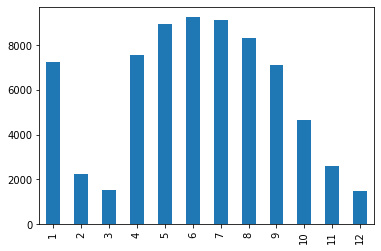

In [ ]:
####Second Way
bins = np.array([0,2500,7000,10000, 33000,68000, 100000, 135000, 170000,210000, 255000, 310000, 10000000])
digitized = np.digitize(df.mileage, bins)
pd.Series(digitized).value_counts().sort_index().plot.bar();

df["mileage_digitized"]=digitized
df.age.fillna(df.groupby("mileage_digitized").age.transform("median"), inplace=True)
df.mileage.fillna(df.groupby("age").mileage.transform("mean"), inplace=True)
perc_nans(df.mileage)   #checking if every np.nan is full

###Column fuel_consumption

In [ ]:
df['_fuel_con_comb'].value_counts(dropna=False, normalize=True)

NaN     0.304535
5.9     0.025362
6.0     0.024991
5.1     0.022289
5.6     0.020787
5.4     0.020087
5.5     0.019915
5.8     0.019644
6.4     0.019372
6.5     0.017914
5.2     0.017356
5.3     0.016870
6.1     0.015826
6.7     0.015741
5.0     0.015612
6.3     0.015598
5.7     0.015426
6.2     0.015255
4.9     0.014954
6.6     0.014554
4.5     0.013039
6.9     0.012738
4.8     0.012481
6.8     0.012267
7.5     0.012252
4.7     0.011309
7.7     0.011066
7.2     0.010966
7.1     0.010837
4.6     0.010651
4.0     0.010308
4.3     0.010179
7.0     0.010151
3.8     0.010136
7.3     0.009607
4.4     0.009379
4.1     0.008993
7.4     0.008893
4.2     0.008807
8.0     0.008578
7.9     0.007749
0.0     0.007148
7.6     0.006791
8.2     0.006362
3.9     0.005990
8.1     0.005747
3.4     0.005075
8.4     0.004975
3.2     0.004961
8.5     0.004646
7.8     0.004518
3.6     0.004032
8.6     0.004032
8.3     0.004017
3.7     0.003860
9.0     0.003431
8.9     0.002759
9.1     0.002716
9.9     0.0025

In [ ]:
df['_fuel_con_comb']=np.where(df['fuel_type']=="Electric", 0,df['_fuel_con_comb'])

In [ ]:
fill(df,"make_model","fuel_type","_fuel_con_comb","median")

Number of NaN :  0
------------------
0.00     6739
6.00     2402
5.90     2294
5.40     2047
5.60     2012
5.50     1964
5.20     1793
6.70     1761
5.10     1749
5.80     1680
6.30     1622
6.40     1580
6.50     1575
6.10     1537
4.50     1420
5.30     1407
6.60     1348
6.20     1294
7.50     1288
5.00     1261
7.40     1214
6.80     1201
5.70     1146
6.90     1123
4.90     1082
7.20     1031
4.80     1029
4.00     1022
7.00      980
7.70      956
4.60      888
7.10      842
4.70      826
4.30      805
4.10      785
3.80      759
4.40      705
7.30      701
4.20      688
7.90      619
3.60      616
8.00      603
7.60      598
9.00      597
8.10      498
8.20      496
3.90      449
3.40      439
8.50      398
55.50     373
3.20      363
8.40      362
7.80      358
8.60      317
3.70      307
8.30      293
10.00     292
5.45      275
9.90      232
9.30      229
9.10      217
6.15      211
8.90      203
8.80      192
11.50     182
8.70      177
9.50      161
9.40      158
9.20      

### Column Power



In [ ]:
df['Power'].value_counts(dropna=False, normalize=True)

In [ ]:
fill(df, 'make_model','body_type','Power',"mean")

Number of NaN :  6130
------------------
NaN      6130
110.0    4274
88.0     2959
90.0     2572
100.0    2514
85.0     2426
66.0     1846
96.0     1817
103.0    1571
77.0     1470
125.0    1459
74.0     1441
81.0     1405
82.0     1328
104.0    1293
150.0    1264
92.0     1152
135.0    1107
115.0    1103
118.0    1006
120.0    1004
121.0     986
140.0     982
55.0      972
80.0      916
132.0     816
51.0      792
63.0      785
93.0      784
60.0      775
105.0     728
99.0      679
130.0     593
160.0     586
155.0     585
107.0     550
70.0      542
165.0     540
147.0     534
180.0     483
75.0      478
73.0      433
190.0     402
71.0      312
59.0      311
141.0     290
108.0     289
95.0      279
225.0     277
50.0      270
87.0      263
133.0     258
84.0      255
210.0     251
235.0     247
112.0     240
230.0     231
65.0      230
185.0     228
114.0     228
170.0     221
44.0      220
97.0      216
200.0     215
154.0     190
49.0      188
113.0     188
72.0      163
91.0   

In [ ]:
fill_prop(df,'make_model','Power',)

Number of NaN :  0
------------------
110.0    4524
211.0    4519
100.0    3028
88.0     2994
90.0     2677
85.0     2460
150.0    2065
66.0     1862
96.0     1825
103.0    1649
125.0    1573
77.0     1539
74.0     1521
104.0    1456
81.0     1455
82.0     1335
135.0    1229
92.0     1194
115.0    1175
120.0    1062
118.0    1042
140.0    1017
132.0    1012
121.0     994
55.0      989
80.0      961
60.0      827
51.0      810
93.0      791
63.0      789
105.0     787
160.0     723
180.0     711
155.0     694
99.0      692
165.0     678
107.0     603
130.0     594
70.0      567
147.0     533
73.0      513
75.0      483
190.0     433
210.0     380
71.0      321
59.0      312
185.0     304
141.0     299
87.0      292
108.0     292
112.0     286
95.0      281
50.0      277
133.0     270
114.0     263
65.0      262
84.0      255
170.0     242
44.0      222
200.0     221
97.0      216
113.0     216
162.0     202
154.0     190
49.0      190
91.0      187
72.0      187
145.0     178
68.0      

### Column Empty_Weight

In [ ]:
df['empty_weight'].value_counts(dropna=False, normalize=True)

NaN       0.068696
1295.0    0.025048
1405.0    0.018900
1635.0    0.012653
1180.0    0.010780
1065.0    0.010651
1515.0    0.010322
1395.0    0.009693
1335.0    0.008192
1400.0    0.008092
1430.0    0.007592
1265.0    0.007563
1275.0    0.007248
1280.0    0.006991
1245.0    0.006233
1270.0    0.006176
1325.0    0.006105
1355.0    0.005819
1365.0    0.005418
1250.0    0.005404
1345.0    0.005376
1290.0    0.005361
1385.0    0.005318
1285.0    0.005104
1240.0    0.005090
1390.0    0.005047
1712.0    0.004932
1660.0    0.004847
1745.0    0.004847
1170.0    0.004732
1255.0    0.004718
1310.0    0.004618
1455.0    0.004589
1445.0    0.004489
1505.0    0.004446
1375.0    0.004332
1380.0    0.004332
1125.0    0.004146
1470.0    0.004075
1370.0    0.004046
1294.0    0.004046
1177.0    0.004032
1475.0    0.003946
1485.0    0.003846
1465.0    0.003832
1495.0    0.003703
1360.0    0.003660
2050.0    0.003574
1715.0    0.003503
1060.0    0.003503
1410.0    0.003388
1175.0    0.003388
1050.0    0.

In [ ]:
fill(df, 'make_model','body_type','empty_weight',"mean")

Number of NaN :  4805
------------------
NaN       4805
1295.0    1752
1405.0    1322
1635.0     885
1180.0     754
1065.0     745
1515.0     722
1395.0     678
1335.0     573
1400.0     566
1430.0     531
1265.0     529
1275.0     507
1280.0     489
1245.0     436
1270.0     432
1325.0     427
1355.0     407
1365.0     379
1250.0     378
1345.0     376
1290.0     375
1385.0     372
1285.0     357
1240.0     356
1390.0     353
1712.0     345
1660.0     339
1745.0     339
1170.0     331
1255.0     330
1310.0     323
1455.0     321
1445.0     314
1505.0     311
1375.0     303
1380.0     303
1125.0     290
1470.0     285
1370.0     283
1294.0     283
1177.0     282
1475.0     276
1485.0     269
1465.0     268
1495.0     259
1360.0     256
2050.0     250
1715.0     245
1060.0     245
1410.0     237
1175.0     237
1050.0     235
1480.0     234
1260.0     233
1130.0     231
1225.0     228
1499.0     227
1975.0     225
1153.0     224
1220.0     215
1215.0     214
1744.0     212
1234.0     210

In [ ]:
fill_prop(df,'make_model','empty_weight',)

Number of NaN :  0
------------------
2094.0    2822
1295.0    1793
1405.0    1361
1635.0     901
1065.0     884
1180.0     773
1515.0     730
1395.0     696
1335.0     584
1400.0     578
1050.0     563
1265.0     546
1430.0     537
1275.0     519
1280.0     511
1245.0     487
1015.0     453
1270.0     449
1325.0     431
1355.0     420
1365.0     391
1250.0     391
1290.0     385
1345.0     384
1385.0     375
1285.0     366
1240.0     362
1390.0     360
1060.0     359
1712.0     349
1255.0     348
1660.0     346
1745.0     346
1155.0     345
1170.0     339
1455.0     332
1310.0     331
1445.0     320
1005.0     318
1505.0     316
1380.0     310
1375.0     307
1135.0     306
1125.0     304
1470.0     297
1370.0     290
1294.0     286
1177.0     284
1475.0     280
1410.0     278
1000.0     277
1465.0     275
1485.0     275
1360.0     265
1495.0     264
2050.0     256
1715.0     249
1260.0     242
1130.0     240
1175.0     239
1480.0     238
1225.0     233
1153.0     233
1330.0     232
10

In [ ]:
#df['empty_class_2']=df[df['empty_weight']<1588]['empty_weight']
#df['empty_class_3']=df[(1588<df['empty_weight'])& (2568>df['empty_weight'])]['empty_weight']
#df['empty_class_4']=df[(2568<df['empty_weight'])& (4536>df['empty_weight'])]['empty_weight']

### Column general_inspection

In [ ]:
df['general_inspection'].value_counts(dropna=False, normalize=True)

2022    0.322506
2222    0.248706
NaN     0.239356
2023    0.089912
2025    0.047365
2024    0.043062
2021    0.007735
2020    0.000600
2026    0.000372
2019    0.000200
2018    0.000057
2016    0.000057
2017    0.000043
2014    0.000014
2015    0.000014
Name: general_inspection, dtype: float64

In [ ]:
fill(df, 'age','fuel_type','general_inspection',"mode")

Number of NaN :  0
------------------
2022    31070
2222    19185
2023     7877
2025     7171
2024     4005
2021      543
2020       42
2026       26
2019       14
2018        4
2016        4
2017        3
2014        1
2015        1
Name: general_inspection, dtype: int64


In [ ]:
df['general_inspection'] = df['general_inspection'].astype(int)

In [ ]:
df['general_inspection']=np.where(df['general_inspection']<2022, 0,df['general_inspection'])
df['general_inspection']=np.where(df['general_inspection']>=2022, 1,df['general_inspection'])

In [ ]:
df['general_inspection'].value_counts(dropna=False, normalize=True)

1    0.99125
0    0.00875
Name: general_inspection, dtype: float64

### Column warranty

In [ ]:
df['warranty'].value_counts(dropna=False, normalize=True)

0     0.658937
6     0.269923
3     0.026063
12    0.021931
24    0.015440
1     0.003517
84    0.003303
18    0.000472
36    0.000129
48    0.000086
2     0.000086
26    0.000029
60    0.000029
9     0.000029
10    0.000014
4     0.000014
Name: warranty, dtype: float64

In [ ]:
df['warranty']=np.where(df['warranty']>0, 1,df['warranty'])
df['warranty']=np.where(df['age']<=2, 1,df['warranty'])

In [ ]:
df['warranty'].value_counts(dropna=False, normalize=True)

0    0.535199
1    0.464801
Name: warranty, dtype: float64

### Column emission_class

In [ ]:
df['emission_class'].value_counts(dropna=False, normalize=True)

6.0    0.362837
NaN    0.310154
5.0    0.174149
4.0    0.119792
3.0    0.023990
1.0    0.007234
2.0    0.001844
Name: emission_class, dtype: float64

In [ ]:
fill_most(df,'make_model','emission_class')

Number of NaN :  0
------------------
6.0    42077
5.0    14736
4.0    10176
3.0     1910
1.0      908
2.0      139
Name: emission_class, dtype: int64


### Column seats

In [ ]:
df['seats'].value_counts(dropna=False, normalize=True)

5.0    0.758800
4.0    0.089240
NaN    0.076330
2.0    0.028579
7.0    0.028322
3.0    0.014325
6.0    0.003074
9.0    0.000858
8.0    0.000472
Name: seats, dtype: float64

In [ ]:
fill_most(df,'make_model','seats')

Number of NaN :  0
------------------
5.0    57382
4.0     6647
2.0     2301
7.0     2096
3.0     1212
6.0      215
9.0       60
8.0       33
Name: seats, dtype: int64


### Column engine_size

In [ ]:
df['engine_size'].value_counts(dropna=False, normalize=True)

NaN        0.082950
1598.0     0.071041
1998.0     0.042476
999.0      0.037343
1199.0     0.036857
1395.0     0.035442
1798.0     0.033783
1995.0     0.032725
1969.0     0.031953
1984.0     0.030209
1498.0     0.026049
1390.0     0.025491
1997.0     0.024233
1197.0     0.023561
998.0      0.023204
1968.0     0.021974
1499.0     0.019415
1595.0     0.018571
1591.0     0.016999
1461.0     0.014797
1560.0     0.014740
1991.0     0.012724
1999.0     0.011109
1596.0     0.011094
1796.0     0.011023
898.0      0.009722
2967.0     0.008950
1332.0     0.008607
2993.0     0.008092
1580.0     0.008078
1364.0     0.007920
2143.0     0.007720
1496.0     0.007477
1242.0     0.007134
2435.0     0.007105
2979.0     0.005976
875.0      0.005933
1587.0     0.005690
1396.0     0.005304
1198.0     0.005261
2400.0     0.004975
1330.0     0.004489
2521.0     0.004389
1248.0     0.004346
1368.0     0.004332
1477.0     0.003803
2488.0     0.003703
2987.0     0.003474
2497.0     0.003388
2995.0     0.003345


In [ ]:
df['engine_size']=np.where(df['engine_size']<800, np.nan,df['engine_size'])
df['engine_size']=np.where(df['engine_size']>7000, np.nan,df['engine_size'])

In [ ]:
fill_most(df,'make_model','engine_size')

Number of NaN :  0
------------------
1598.0    8484
1998.0    2985
1199.0    2914
999.0     2705
1395.0    2518
1798.0    2371
1995.0    2341
1969.0    2251
1984.0    2131
1498.0    1829
1390.0    1789
1997.0    1739
1197.0    1653
998.0     1643
1968.0    1547
1591.0    1532
1499.0    1369
1595.0    1306
1560.0    1048
1461.0    1043
1991.0     910
1580.0     802
1796.0     781
1596.0     777
1999.0     777
898.0      682
2967.0     633
1332.0     620
2143.0     603
1364.0     578
2993.0     571
1496.0     524
1242.0     506
2435.0     500
875.0      436
2979.0     420
1587.0     402
1396.0     372
1198.0     368
2400.0     348
1149.0     343
3000.0     335
1330.0     314
1248.0     311
2521.0     307
1368.0     303
1477.0     293
2488.0     259
1229.0     254
2987.0     243
1398.0     242
2497.0     239
2995.0     234
1000.0     216
2996.0     201
1497.0     200
1618.0     192
1339.0     191
2198.0     189
1987.0     177
2494.0     176
1397.0     176
1794.0     174
1329.0     170
13

#Outliers

## price

count        values
0                     IQR  19540.000000
1             Lower Bound      1.000000
2                      Q1   8950.000000
3                      Q2  17400.000000
4                      Q3  28490.000000
5             Upper Bound  57800.000000
6       Count of Outliers   3907.000000
7  Percentage of Outliers      0.055857

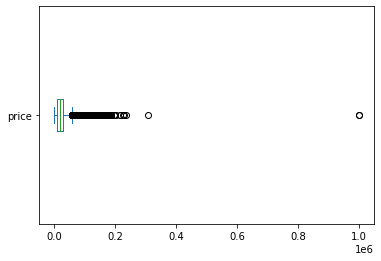

In [ ]:
df.price.plot.box(vert=False)
outliers(df.price)

In [ ]:
df.drop(df[df.price > 200000.0 ].index, inplace=True)
df.drop(df[df.price <500  ].index, inplace=True)

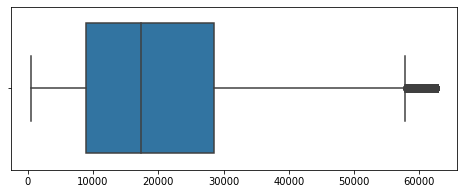

In [ ]:
df.price=capping_outliers(df.price, whisker=1.75)

count        values
0                     IQR  19540.000000
1             Lower Bound    500.000000
2                      Q1   8950.000000
3                      Q2  17400.000000
4                      Q3  28490.000000
5             Upper Bound  57800.000000
6       Count of Outliers   3899.000000
7  Percentage of Outliers      0.055767

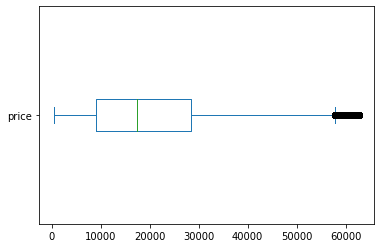

In [ ]:
df.price.plot.box(vert=False)
outliers(df.price)

## mileage

count         values
0                     IQR  133239.500000
1             Lower Bound       1.000000
2                      Q1   29010.500000
3                      Q2   94457.000000
4                      Q3  162250.000000
5             Upper Bound  362109.250000
6       Count of Outliers     570.000000
7  Percentage of Outliers       0.008153

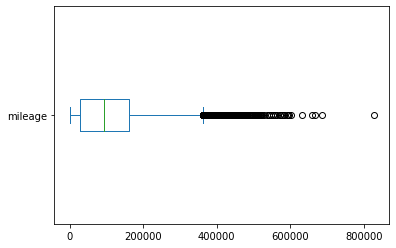

In [ ]:
df.mileage.plot.box(vert=False)
outliers(df.mileage)

In [ ]:
df.drop(df[df.mileage > 550000 ].index, inplace=True)

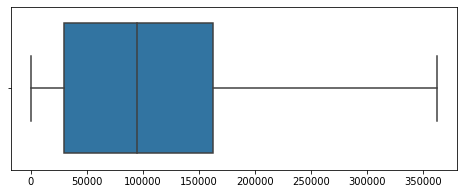

In [ ]:
df.mileage=capping_outliers(df.mileage, whisker=1.5)

count    values
0                     IQR  133178.0
1             Lower Bound       1.0
2                      Q1   29002.0
3                      Q2   94397.0
4                      Q3  162180.0
5             Upper Bound  361947.0
6       Count of Outliers       0.0
7  Percentage of Outliers       0.0

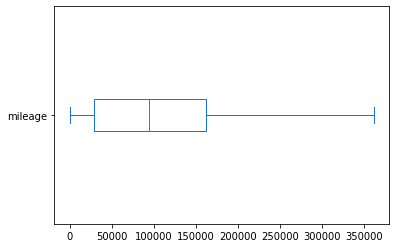

In [ ]:
df.mileage.plot.box(vert=False)
outliers(df.mileage)

## fuel_consumption

count       values
0                     IQR     2.100000
1             Lower Bound     1.650000
2                      Q1     4.800000
3                      Q2     5.800000
4                      Q3     6.900000
5             Upper Bound    10.050000
6       Count of Outliers  8892.000000
7  Percentage of Outliers     0.127216

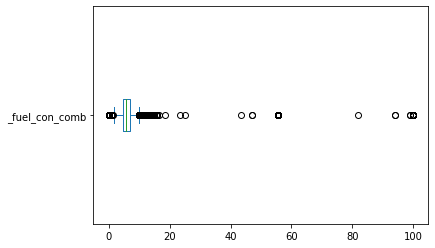

In [ ]:
df["_fuel_con_comb"].plot.box(vert=False)
outliers(df["_fuel_con_comb"])

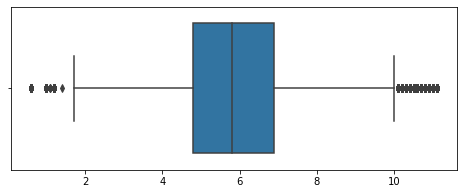

In [ ]:
df["_fuel_con_comb"]=capping_outliers(df["_fuel_con_comb"], whisker=2)

count       values
0                     IQR     2.100000
1             Lower Bound     1.650000
2                      Q1     4.800000
3                      Q2     5.800000
4                      Q3     6.900000
5             Upper Bound    10.050000
6       Count of Outliers  8892.000000
7  Percentage of Outliers     0.127216

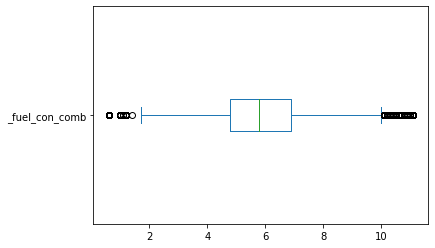

In [ ]:
df["_fuel_con_comb"].plot.box(vert=False)
outliers(df["_fuel_con_comb"])

## co2_emissions

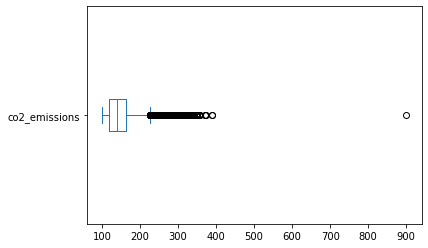

In [ ]:
df.co2_emissions.plot.box(vert=False)

In [ ]:
outliers(df.co2_emissions)

count       values
0                     IQR    43.000000
1             Lower Bound   100.000000
2                      Q1   119.000000
3                      Q2   140.000000
4                      Q3   162.000000
5             Upper Bound   226.500000
6       Count of Outliers  2741.000000
7  Percentage of Outliers     0.039215

In [ ]:
f_log=lambda x:(np.log(x)+1 if x>1 else -np.log(-x)-1 if x<-1 else x)

count       values
0                     IQR     0.308473
1             Lower Bound     5.605170
2                      Q1     5.779123
3                      Q2     5.941642
4                      Q3     6.087596
5             Upper Bound     6.550306
6       Count of Outliers  1378.000000
7  Percentage of Outliers     0.019715

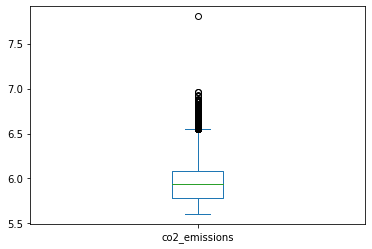

In [ ]:
df['co2_emissions'] = df['co2_emissions'].apply(f_log)
df.co2_emissions.plot.box();
outliers(df.co2_emissions)

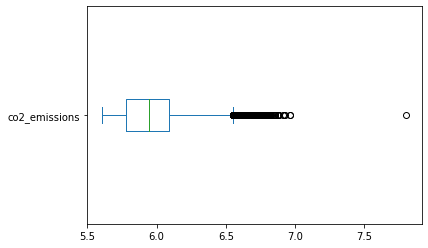

In [ ]:
df.co2_emissions.plot.box(vert=False)

## Power

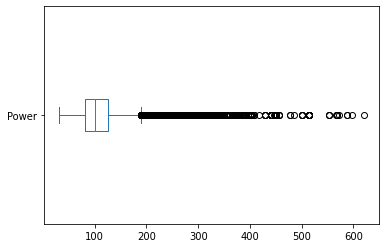

In [ ]:
df.Power.plot.box(vert=False)

In [ ]:
outliers(df.Power)

count       values
0                     IQR    43.000000
1             Lower Bound    32.000000
2                      Q1    82.000000
3                      Q2   100.000000
4                      Q3   125.000000
5             Upper Bound   189.500000
6       Count of Outliers  4723.000000
7  Percentage of Outliers     0.074067

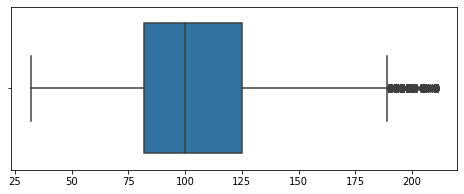

0        110.0
1         92.0
2         90.0
3         92.0
4         92.0
5        132.0
6        110.0
7        110.0
8         85.0
9         90.0
10       118.0
11        90.0
12        77.0
13        92.0
14       136.0
15        90.0
16        90.0
17       125.0
18        71.0
19       125.0
20       195.0
21        90.0
22       125.0
23       103.0
24       132.0
25        70.0
26        77.0
27        92.0
28        77.0
29        90.0
30       103.0
31       155.0
32        93.0
33       136.0
34        77.0
35        90.0
36       136.0
37       155.0
38        82.0
39        90.0
40        71.0
41        90.0
42        77.0
43       118.0
44        90.0
45        90.0
46        90.0
47        82.0
48        90.0
49       136.0
50        90.0
51       132.0
52        71.0
53       155.0
54       110.0
55       141.0
56       141.0
57       125.0
58        90.0
59       110.0
60       110.0
61       132.0
62        90.0
63       136.0
64       195.0
65        92.0
66        

In [ ]:
capping_outliers(df.Power, whisker=2)

count       values
0                     IQR    43.000000
1             Lower Bound    32.000000
2                      Q1    82.000000
3                      Q2   100.000000
4                      Q3   125.000000
5             Upper Bound   189.500000
6       Count of Outliers  4723.000000
7  Percentage of Outliers     0.074067

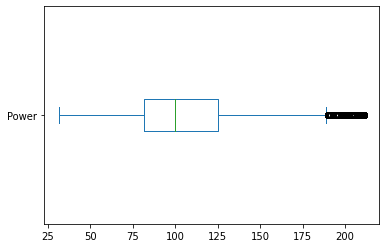

In [ ]:
df.Power.plot.box(vert=False)
outliers(df.Power)

## empty_weight

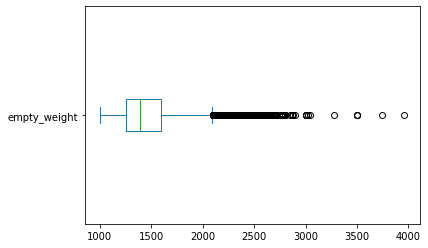

In [ ]:
df.empty_weight.plot.box(vert=False)

In [ ]:
outliers(df.empty_weight)

count      values
0                     IQR   336.00000
1             Lower Bound  1000.00000
2                      Q1  1254.00000
3                      Q2  1390.00000
4                      Q3  1590.00000
5             Upper Bound  2094.00000
6       Count of Outliers  2703.00000
7  Percentage of Outliers     0.04152

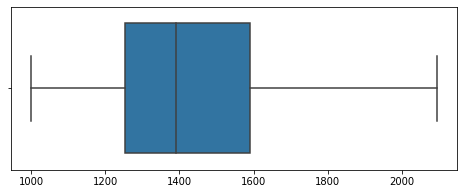

0        1280.0
1        1200.0
2        1200.0
3           NaN
4        1105.0
5        1255.0
6        1210.0
7        1215.0
8        1180.0
9        1125.0
10       1310.0
11       1125.0
12       1345.0
13       1285.0
14       1215.0
15       1150.0
16       1150.0
17       1500.0
18       1065.0
19       1525.0
20       1490.0
21       1200.0
22       1500.0
23       1210.0
24       1255.0
25       1040.0
26       1175.0
27       1115.0
28       1175.0
29       1170.0
30       1210.0
31       1590.0
32       1285.0
33       1165.0
34       1245.0
35       1125.0
36       1190.0
37       1590.0
38       1255.0
39       1200.0
40       1040.0
41       1200.0
42       1145.0
43       1495.0
44       1125.0
45       1125.0
46       1125.0
47       1175.0
48       1125.0
49       1190.0
50       1150.0
51       1500.0
52       1065.0
53       1615.0
54       1210.0
55       1180.0
56       1180.0
57       1500.0
58       1280.0
59       1200.0
60       1210.0
61       1225.0
62      

In [ ]:
capping_outliers(df.empty_weight, whisker=1.5)

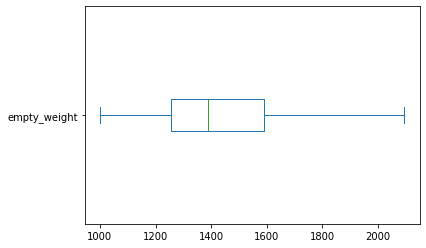

In [ ]:
outliers(df.empty_weight)
df.empty_weight.plot.box(vert=False)

## age

count  values
0                     IQR     8.0
1             Lower Bound     0.0
2                      Q1     3.0
3                      Q2     6.0
4                      Q3    11.0
5             Upper Bound    22.0
6       Count of Outliers     0.0
7  Percentage of Outliers     0.0

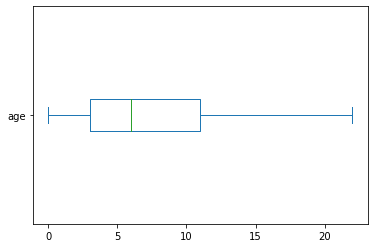

In [ ]:
df.age.plot.box(vert=False)
outliers(df.age)

## engine size

count       values
0                     IQR   596.000000
1             Lower Bound   875.000000
2                      Q1  1395.000000
3                      Q2  1598.000000
4                      Q3  1991.000000
5             Upper Bound  2885.000000
6       Count of Outliers  4262.000000
7  Percentage of Outliers     0.060975

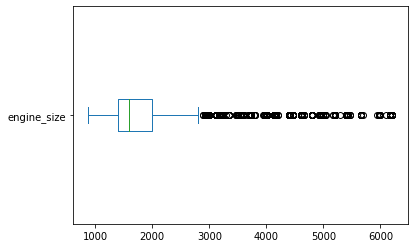

In [ ]:
df.engine_size.plot.box(vert=False)
outliers(df.engine_size)

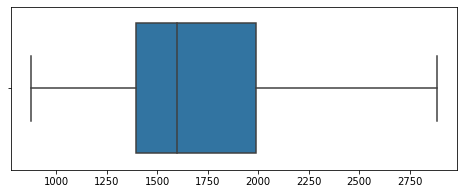

In [ ]:
df.engine_size = capping_outliers(df.engine_size)

count  values
0                     IQR   596.0
1             Lower Bound   875.0
2                      Q1  1395.0
3                      Q2  1598.0
4                      Q3  1991.0
5             Upper Bound  2885.0
6       Count of Outliers     0.0
7  Percentage of Outliers     0.0

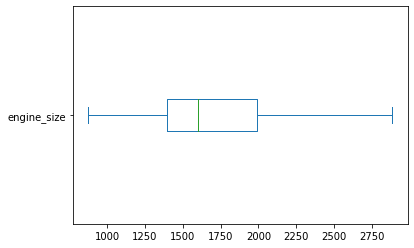

In [ ]:
df.engine_size.plot.box(vert=False)
outliers(df.engine_size)

# Drop

In [ ]:
df.drop(drop_list, axis=1, inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69897 entries, 0 to 69945
Data columns (total 71 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   make                                       69897 non-null  object 
 1   model                                      69897 non-null  object 
 2   price                                      69897 non-null  float64
 3   mileage                                    69897 non-null  float64
 4   fuel_type                                  69897 non-null  object 
 5   seller                                     69897 non-null  object 
 6   body_type                                  69897 non-null  object 
 7   type                                       69897 non-null  object 
 8   drivetrain                                 69897 non-null  object 
 9   seats                                      69897 non-null  float64
 10  doors                 

#Create new data frame

In [ ]:
df.to_pickle('/content/drive/MyDrive/demo/auto2.pkl')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69897 entries, 0 to 69945
Data columns (total 71 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   make                                       69897 non-null  object 
 1   model                                      69897 non-null  object 
 2   price                                      69897 non-null  float64
 3   mileage                                    69897 non-null  float64
 4   fuel_type                                  69897 non-null  object 
 5   seller                                     69897 non-null  object 
 6   body_type                                  69897 non-null  object 
 7   type                                       69897 non-null  object 
 8   drivetrain                                 69897 non-null  object 
 9   seats                                      69897 non-null  float64
 10  doors                 

# Dummies


In [ ]:
df.drop('make', axis=1, inplace=True)
df.drop('model', axis=1, inplace=True)

#### comfort_convenience

In [ ]:
df1=df["comfort_convenience"].str.get_dummies(",").add_prefix("cc_")
df = pd.concat([df, df1], axis=1, join='inner')
df.drop('comfort_convenience', axis=1, inplace=True)

In [ ]:
df.info(1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69897 entries, 0 to 69945
Data columns (total 112 columns):
 #    Column                                     Dtype  
---   ------                                     -----  
 0    price                                      float64
 1    mileage                                    float64
 2    fuel_type                                  object 
 3    seller                                     object 
 4    body_type                                  object 
 5    type                                       object 
 6    drivetrain                                 object 
 7    seats                                      float64
 8    doors                                      float64
 9    warranty                                   int64  
 10   first_registration                         int64  
 11   general_inspection                         int64  
 12   full_service_history                       int64  
 13   non_smoker_vehicle           

#### entertainment_media

In [ ]:
df1=df["entertainment_media"].str.get_dummies(",").add_prefix("ent_")
df= pd.concat([df, df1], axis=1, join='inner')
df.drop('entertainment_media', axis=1, inplace=True)

In [ ]:
df.info(1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69897 entries, 0 to 69945
Data columns (total 127 columns):
 #    Column                                     Dtype  
---   ------                                     -----  
 0    price                                      float64
 1    mileage                                    float64
 2    fuel_type                                  object 
 3    seller                                     object 
 4    body_type                                  object 
 5    type                                       object 
 6    drivetrain                                 object 
 7    seats                                      float64
 8    doors                                      float64
 9    warranty                                   int64  
 10   first_registration                         int64  
 11   general_inspection                         int64  
 12   full_service_history                       int64  
 13   non_smoker_vehicle           

#### safety_security

In [ ]:
df1=df["Safety_Security"].str.get_dummies(",").add_prefix("ss_")
df=pd.concat([df,df1],axis=1, join='inner')
df.drop('Safety_Security', axis=1, inplace=True)

In [ ]:
df.info(1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69897 entries, 0 to 69945
Data columns (total 162 columns):
 #    Column                                     Dtype  
---   ------                                     -----  
 0    price                                      float64
 1    mileage                                    float64
 2    fuel_type                                  object 
 3    seller                                     object 
 4    body_type                                  object 
 5    type                                       object 
 6    drivetrain                                 object 
 7    seats                                      float64
 8    doors                                      float64
 9    warranty                                   int64  
 10   first_registration                         int64  
 11   general_inspection                         int64  
 12   full_service_history                       int64  
 13   non_smoker_vehicle           

## numerical features

In [ ]:
## Differentiate numerical features (minus the target) and categorical features
categorical_features = df.select_dtypes(include=['object']).columns
print(categorical_features)
numerical_features = df.select_dtypes(exclude = ["object"]).columns
print(numerical_features)

#numerical_features = numerical_features.drop("SalePrice")
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
train_num = df[numerical_features]
train_cat = df[categorical_features]

Index(['fuel_type', 'seller', 'body_type', 'type', 'drivetrain', 'Gearbox',
       'gears', 'colour', 'upholstery_colour', 'upholstery', 'make_model',
       'make_country', 'province'],
      dtype='object')
Index(['price', 'mileage', 'seats', 'doors', 'warranty', 'first_registration',
       'general_inspection', 'full_service_history', 'non_smoker_vehicle',
       'Power',
       ...
       'ss_Night_view_assist', 'ss_Passenger_side_airbag', 'ss_Power_steering',
       'ss_Rear_airbag', 'ss_Side_airbag', 'ss_Speed_limit_control_system',
       'ss_Tire_pressure_monitoring_system', 'ss_Traction_control',
       'ss_Traffic_sign_recognition', 'ss_Xenon_headlights'],
      dtype='object', length=149)
Numerical features : 149
Categorical features : 13


In [ ]:
df_object = df.select_dtypes(include = "object")
df_numeric = df.select_dtypes(exclude = "object")
df_object.shape , df_numeric.shape

((69897, 13), (69897, 149))

In [ ]:
df.shape

(69897, 162)

In [ ]:
df_object = pd.get_dummies(df_object, drop_first=False)
df = pd.concat([df_object, df_numeric], axis=1)
df.shape

(69897, 588)

In [ ]:
df.info(1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69897 entries, 0 to 69945
Data columns (total 588 columns):
 #    Column                                     Dtype  
---   ------                                     -----  
 0    fuel_type_Diesel                           uint8  
 1    fuel_type_Electric                         uint8  
 2    fuel_type_Electric/Diesel                  uint8  
 3    fuel_type_Electric/Gasoline                uint8  
 4    fuel_type_Gasoline                         uint8  
 5    fuel_type_LPG                              uint8  
 6    fuel_type_Others                           uint8  
 7    seller_Dealer                              uint8  
 8    seller_Privateseller                       uint8  
 9    body_type_Compact                          uint8  
 10   body_type_Convertible                      uint8  
 11   body_type_Coupe                            uint8  
 12   body_type_Off-Road/Pick-up                 uint8  
 13   body_type_Other              

In [ ]:
corr_matrix = dff.corr().abs()
#yedek = X.copy()
high_corr_var=np.where(corr_matrix>0.90)
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
yedek = []
for i in range(len(high_corr_var)):
  yedek.append(high_corr_var[i][0])
yedek = list(set(yedek))

for i in yedek:
  dff.drop(columns = i, inplace = True)

In [ ]:
yedek

[]

In [ ]:
len(yedek)

0

In [ ]:
df.to_pickle('/content/drive/MyDrive/demo/auto3.pkl')